In [1]:
import twint
import asyncio
import nest_asyncio

In [2]:
nest_asyncio.apply()
c = twint.Config()
c.Search  = "snyderCut"
c.Limit = 10000
c.Store_csv = True
c.Output = "C:/Users/vijayanandanand/OneDrive - Swinburne University/Drive/Vijay/Personal_Projects/Twitter_DataScrapping/data/TweetData.csv"
c.Lang = "en"
c.Since = "2021-03-18"
#c.Translate = True
c.TranslateDest = "en"
twint.run.Search(c)


loop = asyncio.get_event_loop()
loop.is_running()

1373649756501737474 2021-03-22 01:56:37 +1100 <JmCs___> @_Be_Like_Mike_ Ouai voir plus qu'une trilogie. T'as vu la snydercut ?
1373649756027764738 2021-03-22 01:56:37 +1100 <DJMisterVee> Just saw #minari and it's awesome! Tonight, the #snydercut and btw #JayBakerResign
1373649752793903108 2021-03-22 01:56:36 +1100 <LazyAndroids> Every other fanbase now in a post #SnyderCut world..  "we want a four hour movie of the things we love.."  https://t.co/BxbDisJmva
1373649751007059973 2021-03-22 01:56:36 +1100 <sam_kalye> UPDATED: Man Of Steel - 9.5 #ZackSnydersJusticeLeague 8.5 BvS (director's cut) - 8 #WonderWoman - 7 Birds Of Prey - 7 Suicide Squad - 6 Justice League - 4 #Aquaman- 2 #WonderWoman1984 - 1.5 Shazam - 1  #SnyderCut #RestoreTheSnyderVerse  https://t.co/sPKNZDP4nh
1373649749874782216 2021-03-22 01:56:36 +1100 <ogguri> Passei 4 horas ontem assistindo o Snyder Cut e minha vontade hoje é assistir de novo. Pqp, que filme!!!!
1373649748062842884 2021-03-22 01:56:35 +1100 <Defriki> Rel

True

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from googletrans import Translator
from textblob import TextBlob
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("C:/Users/vijayanandanand/OneDrive - Swinburne University/Drive/Vijay/Personal_Projects/Twitter_DataScrapping/data/TweetData.csv")

In [5]:
df.shape

(10000, 36)

In [6]:
df['tweet']

0       @_Be_Like_Mike_ Ouai voir plus qu'une trilogie...
1       Just saw #minari and it's awesome! Tonight, th...
2       Every other fanbase now in a post #SnyderCut w...
3       UPDATED: Man Of Steel - 9.5 #ZackSnydersJustic...
4       Passei 4 horas ontem assistindo o Snyder Cut e...
                              ...                        
9995    Just watched Justice League, i noticed somethi...
9996    So I’m watching the Snyder cut for Justice Lea...
9997    Hot Toys Zack Snyder's Justice League Knightma...
9998                                 Watching Snyder Cut!
9999    @koreflex can finally breathe a sigh of relief...
Name: tweet, Length: 10000, dtype: object

In [35]:
# Tweet Data Cleansing - Removing mentions(@), hastags(#), hyperlinks

def TweetCleansing(tweets, engl=True):
    tweets = re.sub(r'@[A-Za-z0-9]+', '', tweets)
    tweets = re.sub(r'#', '', tweets)
    tweets = re.sub(r'RT[\s]+', '', tweets)
    tweets = re.sub(r'https?:\/\/S+', '', tweets)
    tweets = re.sub(r'Snyder Cut', '', tweets)
    tweets = re.sub(r'ZacksJusticeLeague', '', tweets)
    tweets = re.sub(r'Justice League', '', tweets)
    tweets = re.sub(r'https', '', tweets)
    tweets = re.sub(r'cut', '', tweets)
    tweets = re.sub(r'co', '', tweets)
    tweets = re.sub(r'de', '', tweets)
    tweets = re.sub(r'que', '', tweets)
    tweets = re.sub(r'Snyr', '', tweets)
    tweets = re.sub(r'SnyrCut', '', tweets)
    tweets = re.sub(r'Cut', '', tweets)
    tweets = re.sub(r'to', '', tweets)
    tweets = re.sub(r'snyr', '', tweets)
    tweets = re.sub(r'o', '', tweets)

    translator = Translator()
    if engl:
        tranTweet = tweets
    else:
        tranTweet = translator.translate(tweets, dest='en').dest

    return tranTweet


In [36]:
df = df[df.language == 'en']

In [37]:
df.shape

(5850, 39)

In [38]:
df['tweet'] = df['tweet'].apply(TweetCleansing)
#df['tweet']

In [11]:
# Deriving Subjectivity & Polarity

def getSubjectivity(tweets):
    return TextBlob(tweets).sentiment.subjectivity

def getPolarity(tweets):
    return TextBlob(tweets).sentiment.polarity

In [12]:
# Add two new columns in DataFrame

df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

df['Subjectivity']

1       1.000000
2       0.487500
3       0.000000
5       0.000000
6       0.338889
          ...   
9995    0.000000
9996    0.333333
9997    0.825000
9998    0.000000
9999    1.000000
Name: Subjectivity, Length: 5850, dtype: float64

In [13]:
df['Polarity'] 

1       1.000000
2       0.187500
3       0.000000
5       0.000000
6       0.291667
          ...   
9995    0.000000
9996    0.166667
9997   -0.125000
9998    0.000000
9999    0.000000
Name: Polarity, Length: 5850, dtype: float64

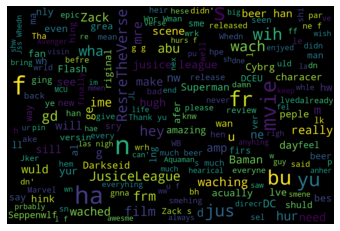

In [39]:
tweet_dict = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width = 1500, height=1000, random_state=21, max_font_size=119).generate(tweet_dict)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

In [15]:
# Derive Postive, Neutral & Negative from Polarity scores

def Analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(Analysis)
df['Analysis']

1       Positive
2       Positive
3        Neutral
5        Neutral
6       Positive
          ...   
9995     Neutral
9996    Positive
9997    Negative
9998     Neutral
9999     Neutral
Name: Analysis, Length: 5850, dtype: object

In [16]:
# Plot Subjectivity Vs Polarity 

plt.figure(figsize=(10,8))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'darkcyan')

plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

KeyError: 0

In [15]:
# % of Positive Tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)


34.5

In [16]:
# % of Negative Tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweet']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

10.8

In [17]:
# % of Neutral Tweets

neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['tweet']

round((neutweets.shape[0] / df.shape[0]) * 100, 1)

54.8

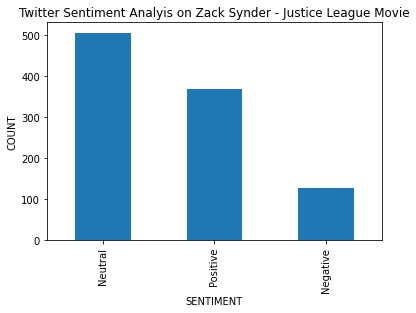

In [124]:
# Visualize the Sentiment

df['Analysis'].value_counts()

plt.title('Twitter Sentiment Analyis on Zack Synder - Justice League Movie')
plt.xlabel('SENTIMENT')
plt.ylabel('COUNT')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()
